In [9]:
import pandas as pd

In [11]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\archive\Housing.csv')

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
# Convert binary categorical columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


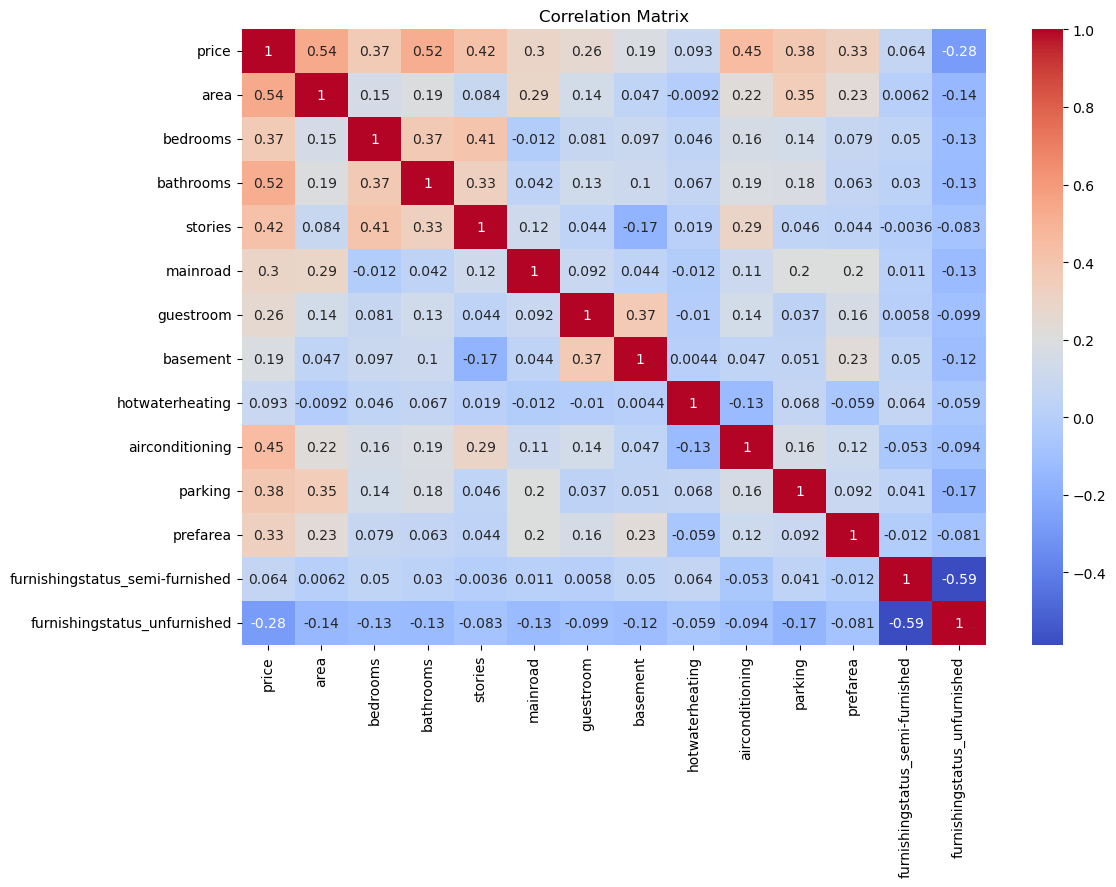

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


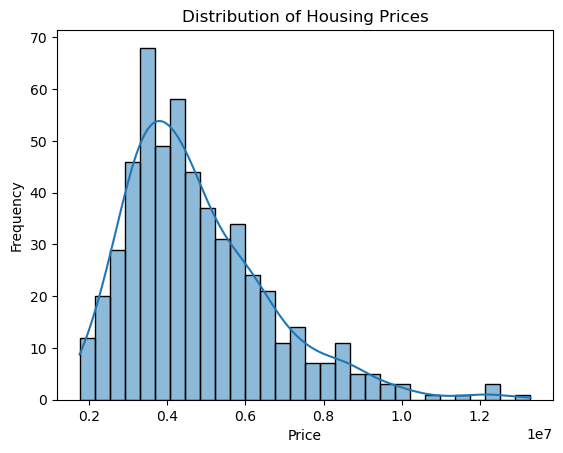

In [17]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

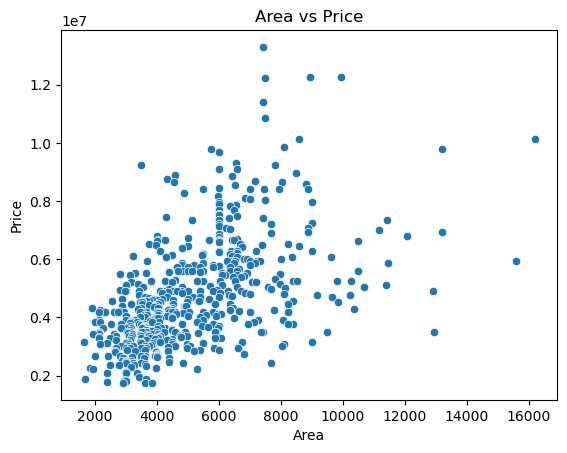

In [21]:
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



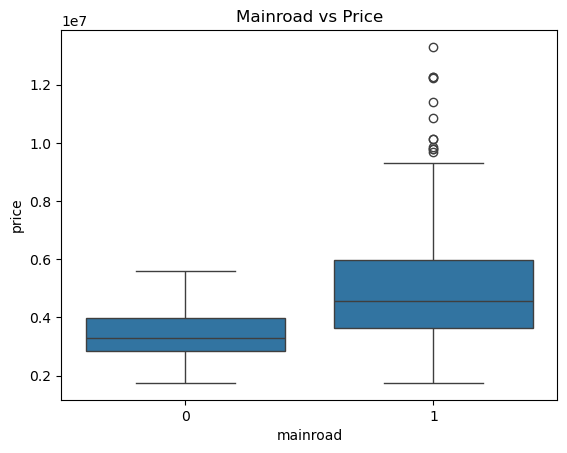

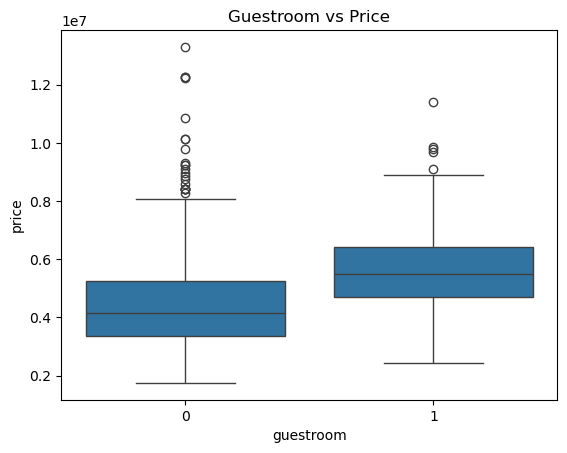

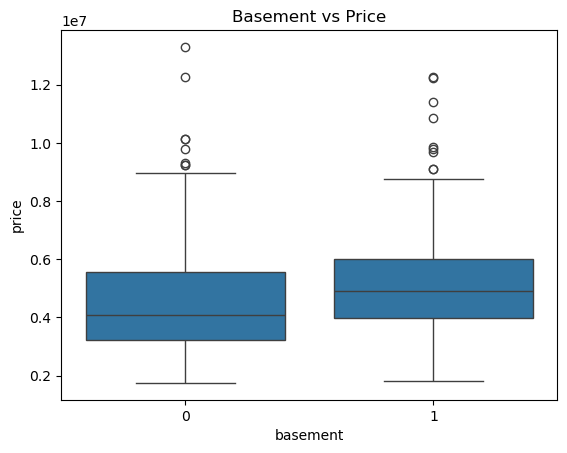

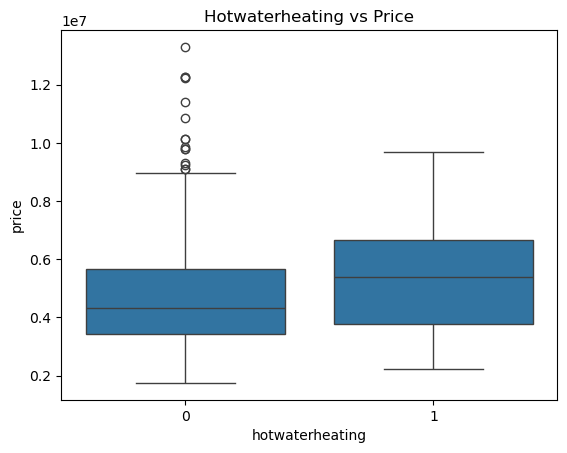

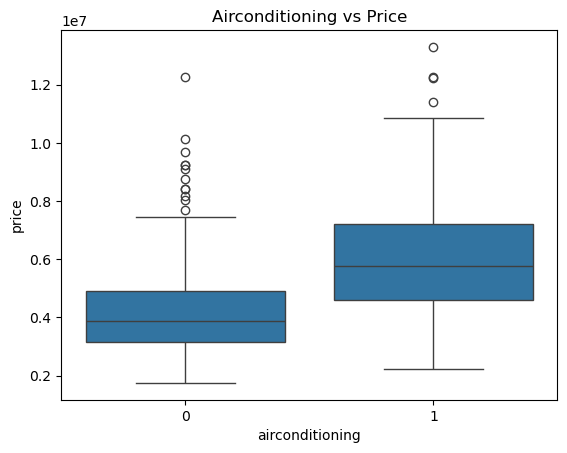

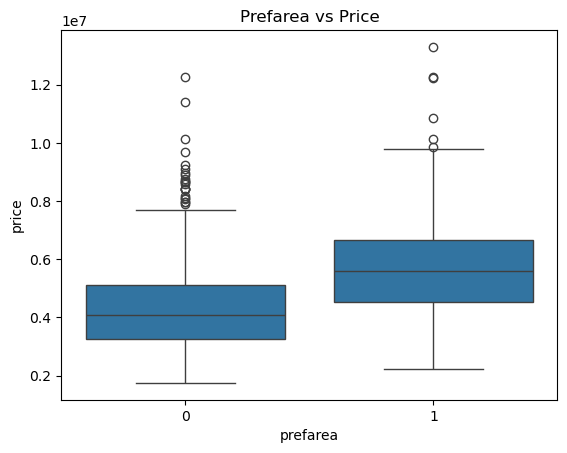

In [23]:
for col in binary_cols:
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col.capitalize()} vs Price')
    plt.show()


In [1]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'df' is not defined

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NameError: name 'X_scaled' is not defined

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"  R² Score: {r2_score(y_test, y_pred):.2f}\n")


Linear Regression:
  MAE: 970043.40
  MSE: 1754318687330.67
  R² Score: 0.65

Decision Tree:
  MAE: 1195266.06
  MSE: 2642802637614.68
  R² Score: 0.48

Random Forest:
  MAE: 1018481.11
  MSE: 1962366397823.41
  R² Score: 0.61

Gradient Boosting:
  MAE: 960513.57
  MSE: 1689088336749.15
  R² Score: 0.67



In [23]:
import joblib

joblib.dump(gb, 'housing_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [25]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load model and scaler
model = joblib.load('housing_price_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    
    # Extract features in correct order
    features = np.array([[
        data['area'], data['bedrooms'], data['bathrooms'], data['stories'],
        data['mainroad'], data['guestroom'], data['basement'],
        data['hotwaterheating'], data['airconditioning'], data['parking'],
        data['prefarea'], data['furnishingstatus_semi-furnished'],
        data['furnishingstatus_unfurnished']
    ]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict
    prediction = model.predict(features_scaled)[0]
    
    return jsonify({'predicted_price': round(prediction, 2)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [37]:
{
  "area": 6000,
  "bedrooms": 3,
  "bathrooms": 2,
  "stories": 2,
  "mainroad": 1,
  "guestroom": 0,
  "basement": 1,
  "hotwaterheating": 0,
  "airconditioning": 1,
  "parking": 2,
  "prefarea": 1,
  "furnishingstatus_semi-furnished": 0,
  "furnishingstatus_unfurnished": 0
}


{'area': 6000,
 'bedrooms': 3,
 'bathrooms': 2,
 'stories': 2,
 'mainroad': 1,
 'guestroom': 0,
 'basement': 1,
 'hotwaterheating': 0,
 'airconditioning': 1,
 'parking': 2,
 'prefarea': 1,
 'furnishingstatus_semi-furnished': 0,
 'furnishingstatus_unfurnished': 0}

In [27]:
curl -X POST http://127.0.0.1:5000/predict \
     -H "Content-Type: application/json" \
     -d '{"area":6000,"bedrooms":3,"bathrooms":2,"stories":2,"mainroad":1,"guestroom":0,"basement":1,"hotwaterheating":0,"airconditioning":1,"parking":2,"prefarea":1,"furnishingstatus_semi-furnished":0,"furnishingstatus_unfurnished":0}'


SyntaxError: invalid syntax (3910977023.py, line 1)

In [35]:
import pickle

# Assuming your model is named gb_model
with open('model.pkl', 'wb') as f:
    pickle.dump(gb, f)


In [21]:
import sys
print(sys.executable)


C:\Users\lenovo\anaconda3\python.exe
